## UAS_AMS
### Klasifikasi Penjualan Sepeda Motor Yamaha dengan Metode Naive Bayes
    Nama : Indah Anggie Ashari
    Nim  : A12.2020.06433

In [3]:
import pandas as pd
import numpy as np
import time

In [105]:
penjualan = pd.read_csv('Dataset_Penjualan2022.csv')

In [106]:
penjualan.shape

(76, 8)

In [107]:
penjualan.head()

,Tanggal,id,NAMA,ALAMAT,Sales,Pembayaran,Type,Jenis Kelamin
0,12/1/2022,895,Rojikin,Pringlangu Pkl,Firman,Cash,Fazzio,Laki-laki
1,12/1/2022,896,Abdan Khanif,Sragi Pkl,Ucup,Cash,Aerox 155,Laki-laki
2,12/2/2022,897,Tarwan,JL.Perintis K Pkl,Erik,Cash,Freego,Laki-laki
3,12/3/2022,898,Kasmuri,Ampelgading PML,Rojek,Cash,Mio M3,Perempuan
4,12/3/2022,899,Abdul Muuiz,Kradenan Pkl,Mubin,Cash,Soul GT,Laki-laki


In [108]:
penjualan.tail()

,Tanggal,id,NAMA,ALAMAT,Sales,Pembayaran,Type,Jenis Kelamin
71,12/1/2022,966,Bambang,Bandarbolang Pml,Isti,Cash,Fazzio,Perempuan
72,12/1/2022,967,Nurul,Kasepuhan Btg,Dol,Kredit,Soul GT,Laki-laki
73,12/1/2022,968,Aini,Pelutan Pml,Ipul,Cash,Fino,Perempuan
74,12/1/2022,969,Audina,Panj Wetan Pkl,Ika,Cash,Fazzio,Perempuan
75,12/1/2022,970,Marya,Wonokerto Pkl,Jamal,Cash,Gear 125,Laki-laki


In [109]:
#menmbahkan library untuk visualisasi data
import plotly.figure_factory as ff
import plotly.express as px
import matplotlib.pyplot as plt

In [110]:
fig = px.bar(penjualan['Sales'].value_counts(),
            title="Data Penjualan Berdasarkan Sales")
fig.show()

In [111]:
fig = px.bar(penjualan['Pembayaran'].value_counts(),
            title="Data Penjualan Berdasarkan Pembayaran")
fig.show()

In [112]:
fig = px.bar(penjualan['Type'].value_counts(),
            title="Data Penjualan Berdasarkan Type")
fig.show()

In [113]:
penjualan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tanggal        76 non-null     object
 1   id             76 non-null     int64 
 2   NAMA           76 non-null     object
 3   ALAMAT         76 non-null     object
 4   Sales          76 non-null     object
 5   Pembayaran     76 non-null     object
 6   Type           76 non-null     object
 7   Jenis Kelamin  76 non-null     object
dtypes: int64(1), object(7)
memory usage: 4.9+ KB


In [114]:
def drop_data():
    print("Proses drop kolom yg tidak diperlukan")
    global penjualan
    penjualan = penjualan.drop(columns=['Tanggal','id','NAMA','ALAMAT'])
    time.sleep(10)
    print("Drop Berhasil")
    time.sleep(5) 
    print("Proses Selesai")

In [115]:
drop_data()

Proses drop kolom yg tidak diperlukan
Drop Berhasil
Proses Selesai


In [116]:
penjualan

,Sales,Pembayaran,Type,Jenis Kelamin
0,Firman,Cash,Fazzio,Laki-laki
1,Ucup,Cash,Aerox 155,Laki-laki
2,Erik,Cash,Freego,Laki-laki
3,Rojek,Cash,Mio M3,Perempuan
4,Mubin,Cash,Soul GT,Laki-laki
...,...,...,...,...
71,Isti,Cash,Fazzio,Perempuan
72,Dol,Kredit,Soul GT,Laki-laki
73,Ipul,Cash,Fino,Perempuan
74,Ika,Cash,Fazzio,Perempuan


In [117]:
def cleaning_data():
    global penjualan
    penjualan['Pembayaran'] = penjualan['Pembayaran'].str.replace('Cash','1',regex=True) #Cash 1
    penjualan['Pembayaran'] = penjualan['Pembayaran'].str.replace('Kredit','2',regex=True) #Kredit 2
    time.sleep(5) 
    print("Cleaning Data Pembayaran Berhasil")
    penjualan['Jenis Kelamin'] = penjualan['Jenis Kelamin'].str.replace('Laki-laki','1',regex=True) #Laki-laki 1
    penjualan['Jenis Kelamin'] = penjualan['Jenis Kelamin'].str.replace('Perempuan','2',regex=True) #Perempuan 2
    time.sleep(5) 
    print("Cleaning Data Jenis Kelamin Berhasil")
    penjualan['Sales'] = penjualan['Sales'].str.replace('Ika','1',regex=True)
    penjualan['Sales'] = penjualan['Sales'].str.replace('Erik','2',regex=True)
    penjualan['Sales'] = penjualan['Sales'].str.replace('Dol','3',regex=True)
    penjualan['Sales'] = penjualan['Sales'].str.replace('Ipul','4',regex=True)
    penjualan['Sales'] = penjualan['Sales'].str.replace('Isti','5',regex=True)
    penjualan['Sales'] = penjualan['Sales'].str.replace('Mubin','6',regex=True)
    penjualan['Sales'] = penjualan['Sales'].str.replace('Ucup','7',regex=True)
    penjualan['Sales'] = penjualan['Sales'].str.replace('Titik','8',regex=True)
    penjualan['Sales'] = penjualan['Sales'].str.replace('Amik','9',regex=True)
    penjualan['Sales'] = penjualan['Sales'].str.replace('Firman','10',regex=True)
    penjualan['Sales'] = penjualan['Sales'].str.replace('MJM','11',regex=True)
    penjualan['Sales'] = penjualan['Sales'].str.replace('Nada','12',regex=True)
    penjualan['Sales'] = penjualan['Sales'].str.replace('Jamal','13',regex=True)
    penjualan['Sales'] = penjualan['Sales'].str.replace('Rojek','14',regex=True)
    penjualan['Sales'] = penjualan['Sales'].str.replace('PTJ','15',regex=True)
    penjualan['Sales'] = penjualan['Sales'].str.replace('Haikal','16',regex=True)
    time.sleep(5) 
    print("Cleaning Data Sales Berhasil")
    penjualan['Type'] = penjualan['Type'].str.replace('Fino','1',regex=True)
    penjualan['Type'] = penjualan['Type'].str.replace('fazzio','2',regex=True)
    penjualan['Type'] = penjualan['Type'].str.replace('freego','3',regex=True)
    penjualan['Type'] = penjualan['Type'].str.replace('Xmax','4',regex=True)
    penjualan['Type'] = penjualan['Type'].str.replace('Mio M3','5',regex=True)
    penjualan['Type'] = penjualan['Type'].str.replace('Tmax DX','6',regex=True)
    penjualan['Type'] = penjualan['Type'].str.replace('Lexi s','7',regex=True)
    penjualan['Type'] = penjualan['Type'].str.replace('MX King','8',regex=True)
    penjualan['Type'] = penjualan['Type'].str.replace('Soul GT','9',regex=True)
    penjualan['Type'] = penjualan['Type'].str.replace('XRide 125','10',regex=True)
    penjualan['Type'] = penjualan['Type'].str.replace('Aerox 155','11',regex=True)
    penjualan['Type'] = penjualan['Type'].str.replace('Gear 125','12',regex=True)
    penjualan['Type'] = penjualan['Type'].str.replace('Tricity','13',regex=True)
    penjualan['Type'] = penjualan['Type'].str.replace('Vario','14',regex=True)
    penjualan['Type'] = penjualan['Type'].str.replace('Nmax 155','15',regex=True)
    penjualan['Type'] = penjualan['Type'].str.replace('Grand Filano','16',regex=True)
    time.sleep(5) 
    print("Cleaning Data Type Berhasil")
    time.sleep(2)
    print("Proses Selesai")

In [118]:
cleaning_data()

Cleaning Data Pembayaran Berhasil
Cleaning Data Jenis Kelamin Berhasil
Cleaning Data Sales Berhasil
Cleaning Data Type Berhasil
Proses Selesai


In [119]:
penjualan

,Sales,Pembayaran,Type,Jenis Kelamin
0,10,1,Fazzio,1
1,7,1,11,1
2,2,1,Freego,1
3,14,1,5,2
4,6,1,9,1
...,...,...,...,...
71,5,1,Fazzio,2
72,3,2,9,1
73,4,1,1,2
74,1,1,Fazzio,2


In [120]:
import seaborn as sns

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



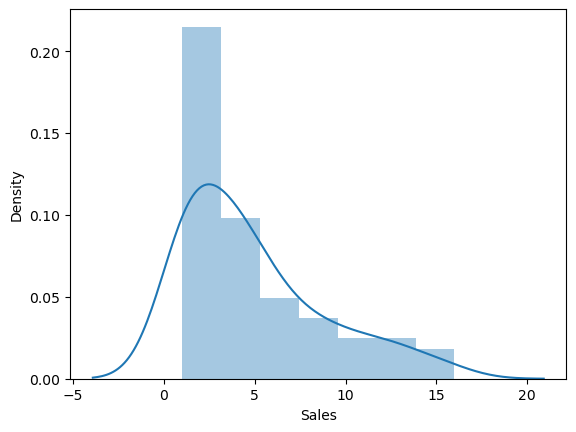

In [121]:
#Melihat distribusi data
fig = sns.distplot(penjualan['Sales'])
plt.show()

In [122]:
penjualan_one = pd.read_csv('Dataset_penjualan2022.csv') 

In [123]:
df = [penjualan_one,penjualan]
result = pd.concat(df,axis=1)

In [124]:
result = result.drop(["Tanggal","id","NAMA","ALAMAT"],axis=1)

In [125]:
result

,Sales,Pembayaran,Type,Jenis Kelamin,Sales,Pembayaran,Type,Jenis Kelamin
0,Firman,Cash,Fazzio,Laki-laki,10,1,Fazzio,1
1,Ucup,Cash,Aerox 155,Laki-laki,7,1,11,1
2,Erik,Cash,Freego,Laki-laki,2,1,Freego,1
3,Rojek,Cash,Mio M3,Perempuan,14,1,5,2
4,Mubin,Cash,Soul GT,Laki-laki,6,1,9,1
...,...,...,...,...,...,...,...,...
71,Isti,Cash,Fazzio,Perempuan,5,1,Fazzio,2
72,Dol,Kredit,Soul GT,Laki-laki,3,2,9,1
73,Ipul,Cash,Fino,Perempuan,4,1,1,2
74,Ika,Cash,Fazzio,Perempuan,1,1,Fazzio,2


## Naive Boyes


In [126]:
#import algoritma naive bayes
from sklearn.naive_bayes import GaussianNB

In [127]:
#import model gaussian
modelnb = GaussianNB()

In [128]:
#memuat data variabel independen kedalam variabel x
x = penjualan.drop(["Jenis Kelamin"],axis=1)
print(x)

   Sales Pembayaran    Type
0     10          1  Fazzio
1      7          1      11
2      2          1  Freego
3    14           1       5
4      6          1       9
..   ...        ...     ...
71     5          1  Fazzio
72     3          2       9
73     4          1       1
74     1          1  Fazzio
75    13          1      12

[76 rows x 3 columns]


In [129]:
#memuat data variabel dependen, yaitu variabel export kedalam variabel x
y = penjualan["Jenis Kelamin"]
print(y)

0     1
1     1
2     1
3     2
4     1
     ..
71    2
72    1
73    2
74    2
75    1
Name: Jenis Kelamin, Length: 76, dtype: object


In [130]:
#import library machine learning sklearn
from sklearn.model_selection import train_test_split

In [131]:
#meload data x dan y kedalam data training dan juga data test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [132]:
x_train.head(5)

,Sales,Pembayaran,Type
70,6,1,13
43,1,1,1
51,1,1,Freego
1,7,1,11
37,2,2,5


In [133]:
x_train.shape

(60, 3)

In [134]:
y_train.head(5)

70    2
43    2
51    2
1     1
37    2
Name: Jenis Kelamin, dtype: object